In [70]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import optuna
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
sisu = pd.read_csv('sisu_trabalhado.csv')

In [3]:
sisu.shape

(5815, 35)

In [4]:
sisu.iloc[:,0:10].head()

,NU_ANO,NU_EDICAO,CO_IES,NO_IES,SG_IES,DS_ORGANIZACAO_ACADEMICA,DS_CATEGORIA_ADM,NO_CAMPUS,NO_MUNICIPIO_CAMPUS,SG_UF_CAMPUS
0,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE
1,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE
2,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE
3,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE
4,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE


In [5]:
sisu.iloc[:,10:20].head()

,DS_REGIAO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_GRAU,DS_TURNO,TP_MOD_CONCORRENCIA,DS_MOD_CONCORRENCIA,NU_PERCENTUAL_BONUS,QT_VAGAS_CONCORRENCIA,NU_NOTACORTE
0,Nordeste,118098,QUÍMICA,Licenciatura,Noturno,A,Ampla concorrência,0,40,625.85
1,Nordeste,1189778,MEDICINA,Bacharelado,Integral,A,Ampla concorrência,0,40,854.48
2,Nordeste,101092,PEDAGOGIA,Licenciatura,Noturno,A,Ampla concorrência,0,40,652.25
3,Nordeste,1321439,COMUNICAÇÃO SOCIAL,Bacharelado,Integral,A,Ampla concorrência,0,20,715.56
4,Nordeste,118092,ENGENHARIA DE PRODUÇÃO,Bacharelado,Integral,A,Ampla concorrência,0,40,671.32


In [6]:
sisu.iloc[:,20:35].head()

,QT_INSCRICAO,Código IES,Instituição(IES),Município,UF,CI,IGC,MUNIC,COD,POP,HIERARQUIA_URBANA,COD_HIERARQUIA_URBANA,GRUPO_HIERARQUIA_URBANA,IA,IA_Q5
0,28.0,580.0,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),Recife,PE,5,4,RECIFE,2611606,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2294139.05
1,221.0,580.0,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),Recife,PE,5,4,RECIFE,2611606,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2294139.05
2,150.0,580.0,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),Recife,PE,5,4,RECIFE,2611606,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2294139.05
3,37.0,580.0,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),Recife,PE,5,4,RECIFE,2611606,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2294139.05
4,21.0,580.0,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),Recife,PE,5,4,RECIFE,2611606,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2294139.05


In [7]:
sisu.columns

Index(['NU_ANO', 'NU_EDICAO', 'CO_IES', 'NO_IES', 'SG_IES',
       'DS_ORGANIZACAO_ACADEMICA', 'DS_CATEGORIA_ADM', 'NO_CAMPUS',
       'NO_MUNICIPIO_CAMPUS', 'SG_UF_CAMPUS', 'DS_REGIAO_CAMPUS',
       'CO_IES_CURSO', 'NO_CURSO', 'DS_GRAU', 'DS_TURNO',
       'TP_MOD_CONCORRENCIA', 'DS_MOD_CONCORRENCIA', 'NU_PERCENTUAL_BONUS',
       'QT_VAGAS_CONCORRENCIA', 'NU_NOTACORTE', 'QT_INSCRICAO', 'Código IES',
       'Instituição(IES)', 'Município', 'UF', 'CI', 'IGC', 'MUNIC', 'COD',
       'POP', 'HIERARQUIA_URBANA', 'COD_HIERARQUIA_URBANA',
       'GRUPO_HIERARQUIA_URBANA', 'IA', 'IA_Q5'],
      dtype='object')

In [8]:
df = sisu[["DS_CATEGORIA_ADM","DS_REGIAO_CAMPUS","DS_GRAU","DS_TURNO","QT_VAGAS_CONCORRENCIA",
     "QT_INSCRICAO","POP","HIERARQUIA_URBANA","COD_HIERARQUIA_URBANA","GRUPO_HIERARQUIA_URBANA",
      "IA","IA_Q5","CI","IGC","NU_NOTACORTE"]].copy()

In [9]:
for col in df.columns:
    total_na = sum(df[col].isna())
    if total_na!=0:
        print(col, ":", total_na, "NA's")

# Tratando atributos para modelo

In [10]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                       QT_VAGAS_CONCORRENCIA  QT_INSCRICAO       POP  \
QT_VAGAS_CONCORRENCIA               1.000000      0.375484  0.074183   
QT_INSCRICAO                        0.375484      1.000000  0.121203   
POP                                 0.074183      0.121203  1.000000   
IA                                  0.076422      0.137822  0.827929   
IA_Q5                               0.092692      0.138116  0.685289   
NU_NOTACORTE                        0.051465      0.372281  0.158547   

                             IA     IA_Q5  NU_NOTACORTE  
QT_VAGAS_CONCORRENCIA  0.076422  0.092692      0.051465  
QT_INSCRICAO           0.137822  0.138116      0.372281  
POP                    0.827929  0.685289      0.158547  
IA                     1.000000  0.930670      0.162372  
IA_Q5                  0.930670  1.000000      0.165266  
NU_NOTACORTE           0.162372  0.165266      1.000000  


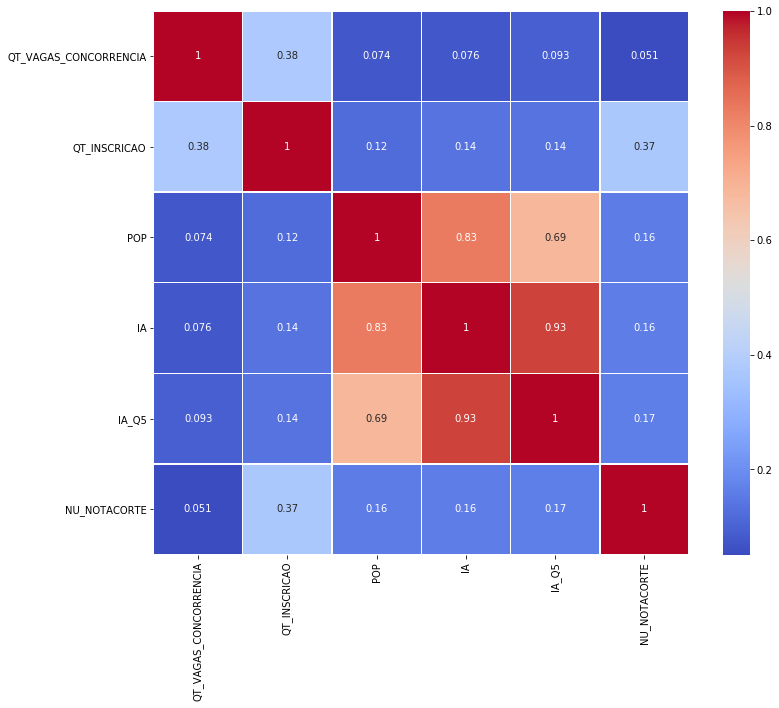

In [11]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Exibir o mapa de calor
plt.show()

In [12]:
df.CI = df.CI.apply(lambda x: str(x))
df.IGC = df.IGC.apply(lambda x: str(x))

In [13]:
df.GRUPO_HIERARQUIA_URBANA = df.GRUPO_HIERARQUIA_URBANA.apply(lambda x: str(x)[0])

In [14]:
df.head()

,DS_CATEGORIA_ADM,DS_REGIAO_CAMPUS,DS_GRAU,DS_TURNO,QT_VAGAS_CONCORRENCIA,QT_INSCRICAO,POP,HIERARQUIA_URBANA,COD_HIERARQUIA_URBANA,GRUPO_HIERARQUIA_URBANA,IA,IA_Q5,CI,IGC,NU_NOTACORTE
0,Pública Federal,Nordeste,Licenciatura,Noturno,40,28.0,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1,3.002146e+06,2294139.05,5,4,625.85
1,Pública Federal,Nordeste,Bacharelado,Integral,40,221.0,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1,3.002146e+06,2294139.05,5,4,854.48
2,Pública Federal,Nordeste,Licenciatura,Noturno,40,150.0,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1,3.002146e+06,2294139.05,5,4,652.25
3,Pública Federal,Nordeste,Bacharelado,Integral,20,37.0,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1,3.002146e+06,2294139.05,5,4,715.56
4,Pública Federal,Nordeste,Bacharelado,Integral,40,21.0,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1,3.002146e+06,2294139.05,5,4,671.32


In [21]:
df2 = df.copy()

In [22]:
# 2. Definir as colunas numéricas, categóricas e ordinais
numeric_features = ['QT_VAGAS_CONCORRENCIA','QT_INSCRICAO','POP','IA','IA_Q5']
categorical_features = ['DS_CATEGORIA_ADM','DS_REGIAO_CAMPUS','DS_GRAU','DS_TURNO','GRUPO_HIERARQUIA_URBANA']
ordinal_features = ['CI','IGC']

In [23]:
# Definir a ordem das categorias ordinais
ordinal_categories = [['-', '2', '3', '4', '5'], ['-', '3', '4', '5']]

In [30]:
# 4. Aplicar transformações separadamente

# Normalizar os dados numéricos
scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

# Codificar variáveis categóricas nominais
one_hot = pd.get_dummies(df2[categorical_features])
# X_train_categorical = onehot.fit_transform(X_train[categorical_features])
# X_test_categorical = onehot.transform(X_test[categorical_features])

# Codificar variáveis ordinais
ordinal = OrdinalEncoder(categories=ordinal_categories)
ord_transform = pd.DataFrame(ordinal.fit_transform(df2[ordinal_features]), columns=ordinal_features)

# 5. Combinar as transformações
df3 = pd.concat([df2[numeric_features], one_hot, ord_transform], axis=1)

In [32]:
df3.columns

Index(['QT_VAGAS_CONCORRENCIA', 'QT_INSCRICAO', 'POP', 'IA', 'IA_Q5',
       'DS_CATEGORIA_ADM_Pública Estadual', 'DS_CATEGORIA_ADM_Pública Federal',
       'DS_CATEGORIA_ADM_Pública Municipal', 'DS_REGIAO_CAMPUS_Centro_Oeste',
       'DS_REGIAO_CAMPUS_Nordeste', 'DS_REGIAO_CAMPUS_Norte',
       'DS_REGIAO_CAMPUS_Sudeste', 'DS_REGIAO_CAMPUS_Sul',
       'DS_GRAU_Bacharelado', 'DS_GRAU_Licenciatura',
       'DS_GRAU_Área Básica de Ingresso (ABI)', 'DS_TURNO_EaD',
       'DS_TURNO_Integral', 'DS_TURNO_Matutino', 'DS_TURNO_Noturno',
       'DS_TURNO_Vespertino', 'GRUPO_HIERARQUIA_URBANA_1',
       'GRUPO_HIERARQUIA_URBANA_2', 'GRUPO_HIERARQUIA_URBANA_3',
       'GRUPO_HIERARQUIA_URBANA_5', 'CI', 'IGC'],
      dtype='object')

In [38]:
# 3. Dividir os dados em conjunto de treino e teste
X = df3
y = df['NU_NOTACORTE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4361, 27)
(4361,)
(1454, 27)
(1454,)


In [53]:
# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test_transformed)

print("Previsões:", y_pred)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Erro absoluto médio (MAE):", mae)
print("Coeficiente de determinação (R²):", r2)

Previsões: [626.87721996 655.23989204 617.1643204  ... 597.26713119 665.13564996
 761.82286047]
Erro quadrático médio (MSE): 3130.147048161973
Erro absoluto médio (MAE): 41.68560424916392
Coeficiente de determinação (R²): 0.3967714324832686


In [42]:
# Treinar o modelo com validação cruzada
model = LinearRegression()
# Definir o número de folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Avaliação usando cross_val_score
mse_scores = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("MSE médio (cross-validation):", mse_scores.mean())
print("MAE médio (cross-validation):", mae_scores.mean())
print("R² médio (cross-validation):", r2_scores.mean())

# Treinar o modelo nos dados de treino completos
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test_transformed)

print("Previsões:", y_pred)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Erro absoluto médio (MAE):", mae)
print("Coeficiente de determinação (R²):", r2)

MSE médio (cross-validation): 3164.5653012687176
MAE médio (cross-validation): 42.69710164977792
R² médio (cross-validation): 0.37804615663007785
Previsões: [626.02756056 655.55502332 616.54160583 ... 596.63547116 665.08065588
 766.6261654 ]
Erro quadrático médio (MSE): 3170.925239056752
Erro absoluto médio (MAE): 41.67288699936439
Coeficiente de determinação (R²): 0.38891283373346675


C:\Users\Mateus\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [61]:
# Definir o estudo do Optuna para a busca Bayesiana
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-6, 1e+6)
    solver = trial.suggest_categorical('solver', ['svd', 'cholesky', 'lsqr', 'sag'])
    tol = trial.suggest_loguniform('tol', 1e-6, 1e-1)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    model = Ridge(alpha=alpha, solver=solver, tol=tol, fit_intercept=fit_intercept)
    
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    return -scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=250)

print("Melhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2024-07-24 16:12:15,730] A new study created in memory with name: no-name-693d9479-2f98-4281-a224-1915af0b17d0
[I 2024-07-24 16:12:15,777] Trial 0 finished with value: 141291.3391610199 and parameters: {'alpha': 43197.676809991695, 'solver': 'sag', 'tol': 4.0475005488135724e-05, 'fit_intercept': False}. Best is trial 0 with value: 141291.3391610199.
[I 2024-07-24 16:12:15,794] Trial 1 finished with value: 3160.071810770673 and parameters: {'alpha': 0.4534908694181004, 'solver': 'cholesky', 'tol': 0.04328990864129007, 'fit_intercept': False}. Best is trial 1 with value: 3160.071810770673.
[I 2024-07-24 16:12:16,857] Trial 2 finished with value: 3164.5525801105046 and parameters: {'alpha': 0.0016703623242072332, 'solver': 'sag', 'tol': 0.00013094942718043843, 'fit_intercept': True}. Best is trial 1 with value: 3160.071810770673.
[I 2024-07-24 16:12:16,883] Trial 3 finished with value: 3168.4575476977 and parameters: {'alpha': 29.47486919670577, 'solver': 'svd', 'tol': 0.00121982017265

[I 2024-07-24 16:12:18,445] Trial 33 finished with value: 3159.60603458944 and parameters: {'alpha': 3.2763199365042525e-06, 'solver': 'lsqr', 'tol': 8.935553911895273e-05, 'fit_intercept': False}. Best is trial 33 with value: 3159.60603458944.
[I 2024-07-24 16:12:18,481] Trial 34 finished with value: 3159.606034565277 and parameters: {'alpha': 1.1637839393561929e-06, 'solver': 'lsqr', 'tol': 8.781853101413096e-05, 'fit_intercept': False}. Best is trial 34 with value: 3159.606034565277.
[I 2024-07-24 16:12:18,514] Trial 35 finished with value: 3164.4765032621417 and parameters: {'alpha': 5.957876460129211e-06, 'solver': 'lsqr', 'tol': 8.621633329532033e-05, 'fit_intercept': True}. Best is trial 34 with value: 3159.606034565277.
[I 2024-07-24 16:12:18,549] Trial 36 finished with value: 3159.941431758223 and parameters: {'alpha': 0.0003647660098667651, 'solver': 'lsqr', 'tol': 0.00029373360498255766, 'fit_intercept': False}. Best is trial 34 with value: 3159.606034565277.
[I 2024-07-24 1

[I 2024-07-24 16:12:22,260] Trial 67 finished with value: 3159.8096309927837 and parameters: {'alpha': 1.03874425846372e-06, 'solver': 'sag', 'tol': 5.1454527407141505e-05, 'fit_intercept': False}. Best is trial 52 with value: 3159.606034564269.
[I 2024-07-24 16:12:22,294] Trial 68 finished with value: 3159.606036295569 and parameters: {'alpha': 0.00015021937882700863, 'solver': 'lsqr', 'tol': 9.251639682597161e-05, 'fit_intercept': False}. Best is trial 52 with value: 3159.606034564269.
[I 2024-07-24 16:12:22,336] Trial 69 finished with value: 3159.796268599493 and parameters: {'alpha': 0.001448184384509145, 'solver': 'svd', 'tol': 0.0007459943629146544, 'fit_intercept': False}. Best is trial 52 with value: 3159.606034564269.
[I 2024-07-24 16:12:22,364] Trial 70 finished with value: 3437.2367766765615 and parameters: {'alpha': 0.0876746490215101, 'solver': 'lsqr', 'tol': 0.07773000311319432, 'fit_intercept': True}. Best is trial 52 with value: 3159.606034564269.
[I 2024-07-24 16:12:22

[I 2024-07-24 16:12:25,203] Trial 101 finished with value: 3159.606034680993 and parameters: {'alpha': 1.1272578129680122e-05, 'solver': 'lsqr', 'tol': 0.00010935102114521351, 'fit_intercept': False}. Best is trial 52 with value: 3159.606034564269.
[I 2024-07-24 16:12:25,239] Trial 102 finished with value: 3159.738129382824 and parameters: {'alpha': 3.035800430359574e-06, 'solver': 'lsqr', 'tol': 0.0001605895519018871, 'fit_intercept': False}. Best is trial 52 with value: 3159.606034564269.
[I 2024-07-24 16:12:25,276] Trial 103 finished with value: 3159.8621547729 and parameters: {'alpha': 2.1329857603021428e-06, 'solver': 'lsqr', 'tol': 6.014513982324631e-05, 'fit_intercept': False}. Best is trial 52 with value: 3159.606034564269.
[I 2024-07-24 16:12:25,308] Trial 104 finished with value: 3160.0381726849864 and parameters: {'alpha': 2.2855695314753847e-05, 'solver': 'lsqr', 'tol': 0.0001274621014187356, 'fit_intercept': False}. Best is trial 52 with value: 3159.606034564269.
[I 2024-0

[I 2024-07-24 16:12:26,797] Trial 134 finished with value: 3159.6060345639576 and parameters: {'alpha': 1.0484033397180067e-06, 'solver': 'lsqr', 'tol': 8.035870425022654e-05, 'fit_intercept': False}. Best is trial 114 with value: 3159.6060345635155.
[I 2024-07-24 16:12:26,832] Trial 135 finished with value: 3159.6869660424686 and parameters: {'alpha': 1.5203840877658864e-06, 'solver': 'lsqr', 'tol': 7.821349173137817e-05, 'fit_intercept': False}. Best is trial 114 with value: 3159.6060345635155.
[I 2024-07-24 16:12:26,868] Trial 136 finished with value: 3159.862154763838 and parameters: {'alpha': 2.3988328927598048e-06, 'solver': 'lsqr', 'tol': 5.905601645525184e-05, 'fit_intercept': False}. Best is trial 114 with value: 3159.6060345635155.
[I 2024-07-24 16:12:26,902] Trial 137 finished with value: 3159.7960263780847 and parameters: {'alpha': 1.012609445071645e-06, 'solver': 'svd', 'tol': 0.0001949243266232287, 'fit_intercept': False}. Best is trial 114 with value: 3159.6060345635155.

[I 2024-07-24 16:12:28,784] Trial 167 finished with value: 3159.6060345708115 and parameters: {'alpha': 1.647792921309859e-06, 'solver': 'lsqr', 'tol': 8.967569881888297e-05, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864.
[I 2024-07-24 16:12:28,823] Trial 168 finished with value: 3159.7314232787758 and parameters: {'alpha': 1.0148398188916233e-06, 'solver': 'lsqr', 'tol': 4.708205727893718e-05, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864.
[I 2024-07-24 16:12:28,859] Trial 169 finished with value: 3159.6060345727224 and parameters: {'alpha': 1.8148433249829381e-06, 'solver': 'lsqr', 'tol': 8.975413267795427e-05, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864.
[I 2024-07-24 16:12:28,894] Trial 170 finished with value: 3159.7960265245024 and parameters: {'alpha': 1.8782021761846855e-06, 'solver': 'svd', 'tol': 8.871115875480097e-05, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864

[I 2024-07-24 16:12:30,152] Trial 200 finished with value: 3160.8601436054014 and parameters: {'alpha': 1.0206653630979592e-06, 'solver': 'sag', 'tol': 0.0027323240356321742, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864.
[I 2024-07-24 16:12:30,191] Trial 201 finished with value: 3159.606034572387 and parameters: {'alpha': 1.7855089271978211e-06, 'solver': 'lsqr', 'tol': 8.632358631495327e-05, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864.
[I 2024-07-24 16:12:30,226] Trial 202 finished with value: 3159.6869660432167 and parameters: {'alpha': 1.846295295225727e-06, 'solver': 'lsqr', 'tol': 7.704774971347176e-05, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864.
[I 2024-07-24 16:12:30,263] Trial 203 finished with value: 3159.6060346081395 and parameters: {'alpha': 4.9105265431793136e-06, 'solver': 'lsqr', 'tol': 9.863659478896374e-05, 'fit_intercept': False}. Best is trial 154 with value: 3159.6060345634864.

[I 2024-07-24 16:12:31,439] Trial 233 finished with value: 3159.606034563456 and parameters: {'alpha': 1.0045651891329763e-06, 'solver': 'lsqr', 'tol': 0.0001171633562163361, 'fit_intercept': False}. Best is trial 233 with value: 3159.606034563456.
[I 2024-07-24 16:12:31,479] Trial 234 finished with value: 3159.7381293832464 and parameters: {'alpha': 3.120348338320611e-06, 'solver': 'lsqr', 'tol': 0.00015654357411866847, 'fit_intercept': False}. Best is trial 233 with value: 3159.606034563456.
[I 2024-07-24 16:12:31,520] Trial 235 finished with value: 3159.606034564968 and parameters: {'alpha': 1.1368041693969049e-06, 'solver': 'lsqr', 'tol': 0.00011088694218455472, 'fit_intercept': False}. Best is trial 233 with value: 3159.606034563456.
[I 2024-07-24 16:12:31,558] Trial 236 finished with value: 3159.6060345652063 and parameters: {'alpha': 1.1576305583075196e-06, 'solver': 'lsqr', 'tol': 0.00011335108895632984, 'fit_intercept': False}. Best is trial 233 with value: 3159.606034563456.


Melhores parâmetros encontrados pelo Optuna:
{'alpha': 1.0045651891329763e-06, 'solver': 'lsqr', 'tol': 0.0001171633562163361, 'fit_intercept': False}


In [62]:
# Treinar o modelo com os melhores parâmetros do Optuna
best_params = study.best_params
model = Ridge(**best_params)
model.fit(X_train, y_train)

# Fazer previsões com os melhores parâmetros do Optuna
y_pred_optuna = model.predict(X_test)

# Avaliar o modelo com os melhores parâmetros do Optuna
mse_optuna = mean_squared_error(y_test, y_pred_optuna)
mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
r2_optuna = r2_score(y_test, y_pred_optuna)

print("Erro quadrático médio (MSE) - Optuna:", mse_optuna)
print("Erro absoluto médio (MAE) - Optuna:", mae_optuna)
print("Coeficiente de determinação (R²) - Optuna:", r2_optuna)

Erro quadrático médio (MSE) - Optuna: 3131.4204277803447
Erro absoluto médio (MAE) - Optuna: 41.69212078261371
Coeficiente de determinação (R²) - Optuna: 0.3965260322029378


In [63]:
# Implementar o Grid Search com os melhores parâmetros do Optuna
grid_search_space = {
    'alpha': [best_params['alpha'] * 0.5, best_params['alpha'], best_params['alpha'] * 1.5],
    'solver': [best_params['solver']],
    'tol': [best_params['tol'] * 0.5, best_params['tol'], best_params['tol'] * 1.5],
    'fit_intercept': [best_params['fit_intercept']]
}

# Implementar o Grid Search
grid_search = GridSearchCV(estimator=Ridge(),
                           param_grid=grid_search_space,
                           cv=3,  # cross-validation com 3 folds
                           n_jobs=-1)  # usar todos os núcleos disponíveis

# Treinar o modelo com Grid Search
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados pelo Grid Search
print("Melhores parâmetros encontrados pelo Grid Search:")
print(grid_search.best_params_)

Melhores parâmetros encontrados pelo Grid Search:
{'alpha': 1.5068477836994645e-06, 'fit_intercept': False, 'solver': 'lsqr', 'tol': 0.0001171633562163361}


In [64]:
# Fazer previsões com os melhores parâmetros do Grid Search
y_pred_grid = grid_search.predict(X_test)

# Avaliar o modelo com os melhores parâmetros do Grid Search
mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print("Erro quadrático médio (MSE) - Grid Search:", mse_grid)
print("Erro absoluto médio (MAE) - Grid Search:", mae_grid)
print("Coeficiente de determinação (R²) - Grid Search:", r2_grid)

Erro quadrático médio (MSE) - Grid Search: 3131.42042777071
Erro absoluto médio (MAE) - Grid Search: 41.69212077579013
Coeficiente de determinação (R²) - Grid Search: 0.39652603220479454


In [72]:
# Definir uma função de objetivo para o optuna
def objective(trial):
    model_type = trial.suggest_categorical('model_type', ['ridge', 'decision_tree', 'svr'])
    
    if model_type == 'ridge':
        alpha = trial.suggest_loguniform('alpha', 1e-6, 1e+6)
        tol = trial.suggest_loguniform('tol', 1e-6, 1e-1)
        model = Ridge(alpha=alpha, tol=tol, random_state=42)
    elif model_type == 'decision_tree':
        max_depth = trial.suggest_int('max_depth', 1, 50)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    else:
        C = trial.suggest_loguniform('C', 1e-6, 1e+6)
        epsilon = trial.suggest_loguniform('epsilon', 1e-6, 1e+1)
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        model = SVR(C=C, epsilon=epsilon, kernel=kernel)
    
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    return -scores.mean()

# Suprimir warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

print("Melhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

# Treinar os modelos com os melhores parâmetros do Optuna e avaliar
best_params = study.best_params
model_type = best_params.pop('model_type')

if model_type == 'ridge':
    model = Ridge(**best_params)
elif model_type == 'decision_tree':
    model = DecisionTreeRegressor(**best_params)
else:
    model = SVR(**best_params)

model.fit(X_train, y_train)
y_pred_optuna = model.predict(X_test)

mse_optuna = mean_squared_error(y_test, y_pred_optuna)
mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
r2_optuna = r2_score(y_test, y_pred_optuna)

print(f"Resultados do modelo {model_type.capitalize()} com Optuna:")
print("Erro quadrático médio (MSE):", mse_optuna)
print("Erro absoluto médio (MAE):", mae_optuna)
print("Coeficiente de determinação (R²):", r2_optuna)

# Implementar o Grid Search com os melhores parâmetros do Optuna
if model_type == 'ridge':
    grid_search_space = {
        'alpha': [best_params['alpha'] * 0.5, best_params['alpha'], best_params['alpha'] * 1.5],
        'tol': [best_params['tol'] * 0.5, best_params['tol'], best_params['tol'] * 1.5]
    }
    model = Ridge()
elif model_type == 'decision_tree':
    grid_search_space = {
        'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
        'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], 
                              best_params['min_samples_split'] + 1]
    }
    model = DecisionTreeRegressor()
else:
    grid_search_space = {
        'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 1.5],
        'epsilon': [best_params['epsilon'] * 0.5, best_params['epsilon'], best_params['epsilon'] * 1.5],
        'kernel': [best_params['kernel']]
    }
    model = SVR()

grid_search = GridSearchCV(estimator=model, param_grid=grid_search_space, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados pelo Grid Search:")
print(grid_search.best_params_)

y_pred_grid = grid_search.predict(X_test)

mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print(f"Resultados do modelo {model_type.capitalize()} com Grid Search:")
print("Erro quadrático médio (MSE):", mse_grid)
print("Erro absoluto médio (MAE):", mae_grid)
print("Coeficiente de determinação (R²):", r2_grid)

[I 2024-07-24 16:24:02,815] A new study created in memory with name: no-name-f1b70a79-e497-4b38-b4aa-d4d7ab571277
[I 2024-07-24 16:24:02,862] Trial 0 finished with value: 2943.2883748561944 and parameters: {'model_type': 'decision_tree', 'max_depth': 37, 'min_samples_split': 8}. Best is trial 0 with value: 2943.2883748561944.
[I 2024-07-24 16:24:02,909] Trial 1 finished with value: 3067.857070137628 and parameters: {'model_type': 'decision_tree', 'max_depth': 19, 'min_samples_split': 6}. Best is trial 0 with value: 2943.2883748561944.
[I 2024-07-24 16:24:02,955] Trial 2 finished with value: 2709.720764052759 and parameters: {'model_type': 'decision_tree', 'max_depth': 14, 'min_samples_split': 16}. Best is trial 2 with value: 2709.720764052759.
[I 2024-07-24 16:24:03,002] Trial 3 finished with value: 2652.785342796893 and parameters: {'model_type': 'decision_tree', 'max_depth': 7, 'min_samples_split': 12}. Best is trial 3 with value: 2652.785342796893.
[I 2024-07-24 16:24:03,049] Trial 

[I 2024-07-24 17:49:11,349] Trial 37 finished with value: 2634.173173551983 and parameters: {'model_type': 'decision_tree', 'max_depth': 17, 'min_samples_split': 20}. Best is trial 4 with value: 2626.6972235208636.
[I 2024-07-24 17:49:11,408] Trial 38 finished with value: 2699.552813331944 and parameters: {'model_type': 'decision_tree', 'max_depth': 27, 'min_samples_split': 16}. Best is trial 4 with value: 2626.6972235208636.
[I 2024-07-24 17:49:12,649] Trial 39 finished with value: 5105.080785224168 and parameters: {'model_type': 'svr', 'C': 1.1573591730245332e-06, 'epsilon': 0.0006713330984810164, 'kernel': 'poly'}. Best is trial 4 with value: 2626.6972235208636.
[I 2024-07-24 17:49:12,696] Trial 40 finished with value: 2638.0331341685837 and parameters: {'model_type': 'decision_tree', 'max_depth': 41, 'min_samples_split': 19}. Best is trial 4 with value: 2626.6972235208636.
[I 2024-07-24 17:49:12,753] Trial 41 finished with value: 2626.6972235208636 and parameters: {'model_type': 'd

Melhores parâmetros encontrados pelo Optuna:
{'model_type': 'svr', 'C': 455.2688483060295, 'epsilon': 0.0019320852481680914, 'kernel': 'rbf'}
Resultados do modelo Svr com Optuna:
Erro quadrático médio (MSE): 1977.4916709840825
Erro absoluto médio (MAE): 32.983469789039326
Coeficiente de determinação (R²): 0.6189062527703111
Melhores parâmetros encontrados pelo Grid Search:
{'C': 682.9032724590443, 'epsilon': 0.002898127872252137, 'kernel': 'rbf'}
Resultados do modelo Svr com Grid Search:
Erro quadrático médio (MSE): 1939.2604930430118
Erro absoluto médio (MAE): 32.710986237778776
Coeficiente de determinação (R²): 0.6262740020642018


In [73]:
# Treinar os modelos com os melhores parâmetros do Optuna e avaliar
best_params = study.best_params
model_type = best_params.pop('model_type')

if model_type == 'ridge':
    model = Ridge(**best_params)
elif model_type == 'decision_tree':
    model = DecisionTreeRegressor(**best_params)
else:
    model = SVR(**best_params)

model.fit(X_train, y_train)
y_pred_optuna = model.predict(X_test)

mse_optuna = mean_squared_error(y_test, y_pred_optuna)
mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
r2_optuna = r2_score(y_test, y_pred_optuna)

print(f"Resultados do modelo {model_type.capitalize()} com Optuna:")
print("Erro quadrático médio (MSE):", mse_optuna)
print("Erro absoluto médio (MAE):", mae_optuna)
print("Coeficiente de determinação (R²):", r2_optuna)

Resultados do modelo Svr com Optuna:
Erro quadrático médio (MSE): 1977.4916709840825
Erro absoluto médio (MAE): 32.983469789039326
Coeficiente de determinação (R²): 0.6189062527703111


In [74]:
# Implementar o Grid Search com os melhores parâmetros do Optuna
if model_type == 'ridge':
    grid_search_space = {
        'alpha': [best_params['alpha'] * 0.5, best_params['alpha'], best_params['alpha'] * 1.5],
        'tol': [best_params['tol'] * 0.5, best_params['tol'], best_params['tol'] * 1.5]
    }
    model = Ridge()
elif model_type == 'decision_tree':
    grid_search_space = {
        'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
        'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1]
    }
    model = DecisionTreeRegressor()
else:
    grid_search_space = {
        'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 1.5],
        'epsilon': [best_params['epsilon'] * 0.5, best_params['epsilon'], best_params['epsilon'] * 1.5],
        'kernel': [best_params['kernel']]
    }
    model = SVR()

grid_search = GridSearchCV(estimator=model, param_grid=grid_search_space, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados pelo Grid Search:")
print(grid_search.best_params_)

y_pred_grid = grid_search.predict(X_test)

mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print(f"Resultados do modelo {model_type.capitalize()} com Grid Search:")
print("Erro quadrático médio (MSE):", mse_grid)
print("Erro absoluto médio (MAE):", mae_grid)
print("Coeficiente de determinação (R²):", r2_grid)

Melhores parâmetros encontrados pelo Grid Search:
{'C': 682.9032724590443, 'epsilon': 0.002898127872252137, 'kernel': 'rbf'}
Resultados do modelo Svr com Grid Search:
Erro quadrático médio (MSE): 1939.2604930430118
Erro absoluto médio (MAE): 32.710986237778776
Coeficiente de determinação (R²): 0.6262740020642018


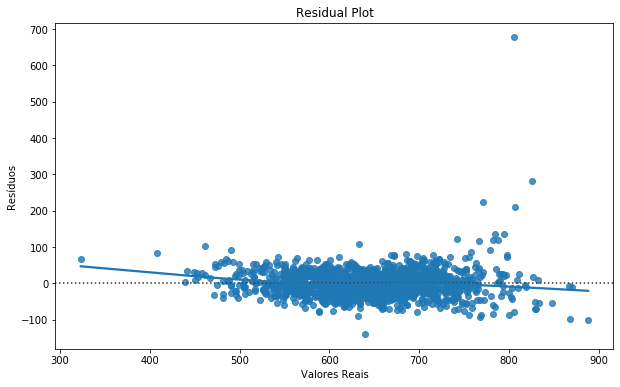

In [75]:
# Análise de diagnóstico com gráficos
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Residual Plot')
plt.show()

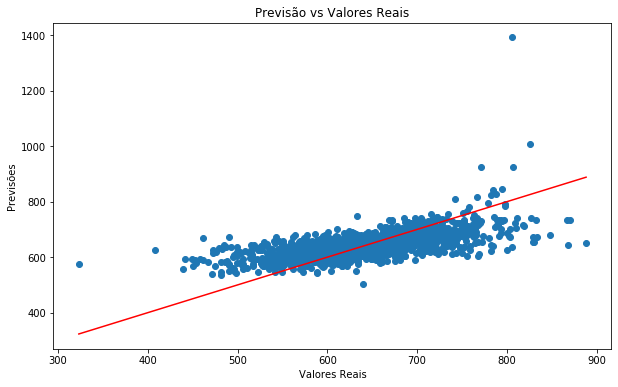

In [76]:
# Scatter plot de previsão vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsão vs Valores Reais')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

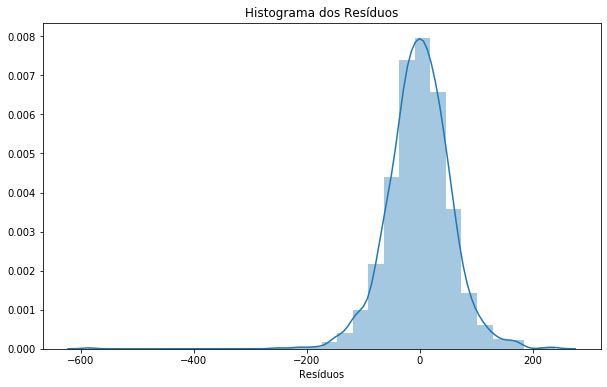

In [77]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.distplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()